# Machine learning:

>Total Marks: 60  
>Each question 20 marks

## Question: 1

Imagine you have a dataset where you have different Instagram features like u sername , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is to predict the number of likes and Time Since posted and the rest of the features are your input features. Now you have to build a model which can predict the number of likes and Time Since posted. 
Dataset This is the Dataset You can use this dataset for this question. 

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [36]:
df=pd.read_csv("instagram_reach.csv")

In [37]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [38]:
df.tail()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
95,8,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,9,21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,10,22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,11,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222
99,12,25,palmariusdev,Obtén tu tienda en línea ahora.,741,#marketing #programming#development #desarroll...,3 hours,109


In [39]:
df.shape

(100, 8)

In [40]:
df=df.drop(columns=['Unnamed: 0','S.No'])

In [41]:
df.head()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [42]:
df.columns

Index(['USERNAME', 'Caption', 'Followers', 'Hashtags', 'Time since posted',
       'Likes'],
      dtype='object')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   USERNAME           100 non-null    object
 1   Caption            94 non-null     object
 2   Followers          100 non-null    int64 
 3   Hashtags           100 non-null    object
 4   Time since posted  100 non-null    object
 5   Likes              100 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 4.8+ KB


In [44]:
df.describe()

,Followers,Likes
count,100.00000,100.00000
mean,961.96000,46.48000
std,1014.62567,55.08698
min,11.00000,8.00000
25%,252.75000,19.00000
50%,612.00000,29.00000
75%,1197.00000,46.00000
max,4496.00000,349.00000


In [45]:
df.dtypes

USERNAME             object
Caption              object
Followers             int64
Hashtags             object
Time since posted    object
Likes                 int64
dtype: object

In [46]:
df.isnull().sum()

USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [47]:
df.duplicated().sum()

0

In [48]:
num_col=[fea for fea in df.columns if df[fea].dtypes!="o"]

In [49]:
num_col

['USERNAME', 'Caption', 'Followers', 'Hashtags', 'Time since posted', 'Likes']

In [50]:
cat_col=[fea for fea in df.columns if df[fea].dtypes=="o"]

In [51]:
cat_col

[]

In [52]:
df.nunique()

USERNAME             95
Caption              94
Followers            94
Hashtags             98
Time since posted    11
Likes                55
dtype: int64

### Preprocessing

In [54]:
df['Time since posted']

0     11 hours
1      2 hours
2      2 hours
3      3 hours
4      3 hours
        ...   
95     3 hours
96     3 hours
97     3 hours
98     3 hours
99     3 hours
Name: Time since posted, Length: 100, dtype: object

In [55]:
# Convert 'Time since posted' to numerical format (hours)
df['Time since posted'] = df['Time since posted'].str.extract('(\d+)').astype(float)

In [56]:
df['Time since posted']

0     11.0
1      2.0
2      2.0
3      3.0
4      3.0
      ... 
95     3.0
96     3.0
97     3.0
98     3.0
99     3.0
Name: Time since posted, Length: 100, dtype: float64

In [57]:
# Feature engineering on hashtags (count of hashtags)
df['Num_Hashtags'] = df['Hashtags'].apply(lambda x: len(x.split()))

In [58]:
df['Num_Hashtags']

0      5
1     19
2     20
3     20
4     18
      ..
95    10
96    21
97    22
98    21
99    22
Name: Num_Hashtags, Length: 100, dtype: int64

In [59]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
username_encoded = pd.get_dummies(df['USERNAME'], prefix='user')
hashtags_encoded = pd.get_dummies(df['Hashtags'].apply(lambda x: ' '.join(x.split())), prefix='tag')

In [60]:
# Combine encoded features with the original DataFrame
df = pd.concat([df, username_encoded, hashtags_encoded], axis=1)

In [61]:
# Drop unnecessary columns
df.drop(['USERNAME', 'Caption', 'Hashtags'], axis=1, inplace=True)

In [62]:
# Encode the target variable 'Likes' using LabelEncoder (optional)
label_encoder = LabelEncoder()
df['Likes'] = label_encoder.fit_transform(df['Likes'])

### Splitting data

In [63]:
# Features (X) and target variables (y)
X = df.drop('Likes', axis=1)
y_likes = df['Likes']
y_time = df['Time since posted']

In [64]:
from sklearn.model_selection import train_test_split
# Train-test split
X_train, X_test, y_likes_train, y_likes_test, y_time_train, y_time_test = train_test_split(
    X, y_likes, y_time, test_size=0.2, random_state=42)

### Scaling

In [65]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### Model building and Evaluation

In [66]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [68]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'KNeighbors': KNeighborsRegressor()
}  

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [70]:
for model_name, model in models.items():
    # For predicting likes
    model.fit(X_train, y_likes_train)
    likes_predictions = model.predict(X_test)
    
    # For predicting time
    model.fit(X_train, y_time_train)
    time_predictions = model.predict(X_test)
    
    mae_likes = mean_absolute_error(y_likes_test, likes_predictions)
    mae_time = mean_absolute_error(y_time_test, time_predictions)
    
    r2_likes = r2_score(y_likes_test, likes_predictions)
    r2_time = r2_score(y_time_test, time_predictions)
    
    print(f"{model_name} - Likes: MAE={mae_likes}, R^2={r2_likes}")
    print(f"{model_name} - Time: MAE={mae_time}, R^2={r2_time}")
    print("-----------------------------------------------------")

Linear Regression - Likes: MAE=9.157334272856605, R^2=0.3280570461251483
Linear Regression - Time: MAE=0.08043292547173406, R^2=0.9992452273021055
-----------------------------------------------------
Decision Tree - Likes: MAE=8.75, R^2=0.21889285208411113
Decision Tree - Time: MAE=0.5, R^2=0.802532732345997
-----------------------------------------------------
AdaBoost - Likes: MAE=7.623322303369217, R^2=0.5461920177661561
AdaBoost - Time: MAE=0.42478991596638666, R^2=0.9015246415220761
-----------------------------------------------------
Gradient Boosting - Likes: MAE=6.577599762726474, R^2=0.5918257870487698
Gradient Boosting - Time: MAE=0.19992535161261316, R^2=0.9650765236652646
-----------------------------------------------------
SVR - Likes: MAE=10.812256303383455, R^2=-0.04231228243899299
SVR - Time: MAE=1.9908756454670864, R^2=-0.15007545478790663
-----------------------------------------------------
KNeighbors - Likes: MAE=11.1, R^2=-0.21866106954763787
KNeighbors - Time: 

## Question: 2   
Train an SVM regressor on : Bengaluru housing datase    
   Must include in details:

  - EDA

  - Feature engineering 

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [84]:
df=pd.read_csv("Bengaluru_House_Data.csv")

In [85]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [86]:
df.nunique()

area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [87]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [88]:
# Display summary statistics of numerical columns
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [89]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [90]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [91]:
# Handle missing values
df = df.dropna()

In [92]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

### Visualize Data:

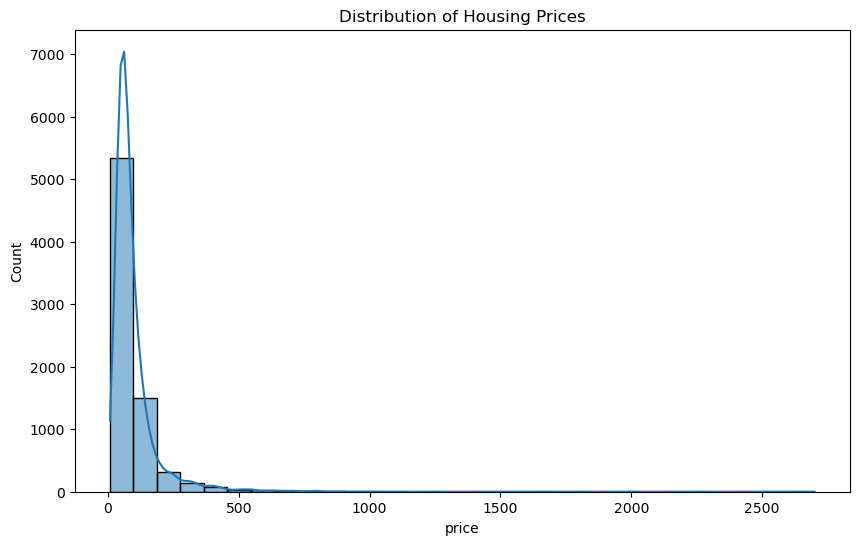

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of 'price'
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Housing Prices')
plt.show()

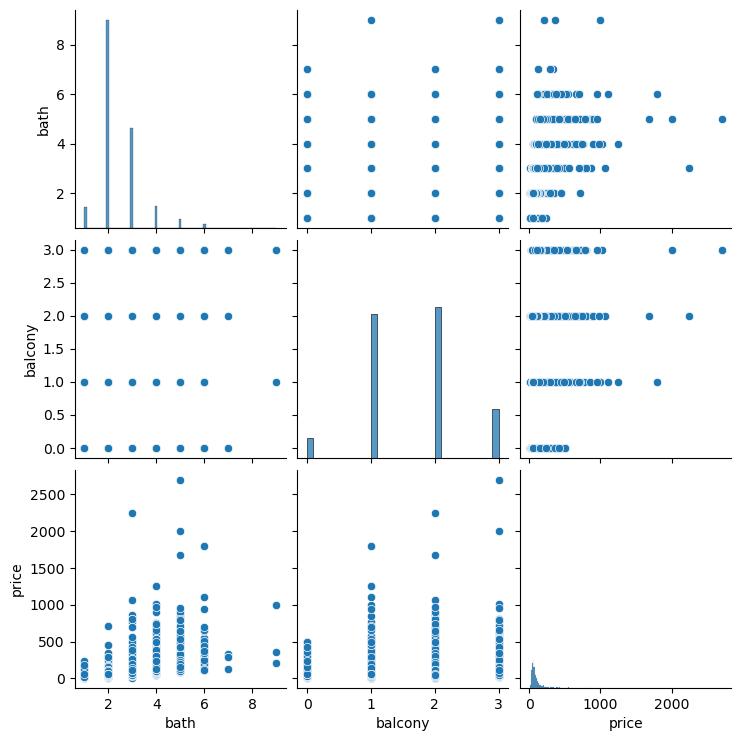

In [82]:
# Visualize relationships between features and target variable
sns.pairplot(df[['total_sqft', 'bath', 'balcony', 'price']])
plt.show()

In [113]:
df.corr()

,bath,balcony,price
bath,1.000000,0.275726,0.594844
balcony,0.275726,1.000000,0.170138
price,0.594844,0.170138,1.000000


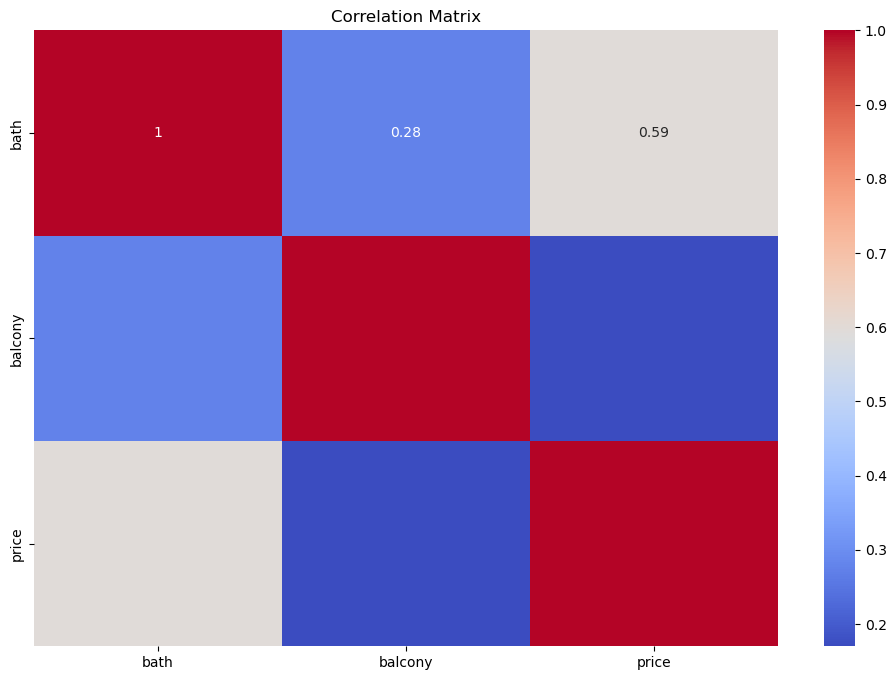

In [112]:
# Explore correlations
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Feature Engineering

In [95]:
df['total_sqft'].value_counts()

total_sqft
1200           172
1100           106
1000            78
1500            74
1300            71
              ... 
2383             1
1103             1
1145 - 1340      1
3080             1
4689             1
Name: count, Length: 1682, dtype: int64

In [96]:
# Feature Engineering:

# Convert 'total_sqft' to numerical format (handle ranges and other non-numeric values)
def convert_total_sqft(total_sqft):
    try:
        # Check if the value is a range
        if '-' in total_sqft:
            tokens = total_sqft.split('-')
            return (float(tokens[0]) + float(tokens[1])) / 2
        # If it's a single value, convert to float
        return float(total_sqft)
    except:
        # If conversion fails, return NaN
        return None

In [97]:
# Apply the conversion function to 'total_sqft'
df['total_sqft'] = df['total_sqft'].apply(convert_total_sqft)

In [98]:
# Drop rows with missing values in 'total_sqft'
df = df.dropna(subset=['total_sqft'])

### Splitting the data

In [99]:
# Assume 'location', 'size', 'total_sqft', 'bath', 'balcony', etc., are features
X = df[['area_type', 'availability', 'location', 'size', 'society','total_sqft', 'bath', 'balcony']]

# Target variable
y = df['price']

### Encoding

In [100]:
# Convert categorical features using one-hot encoding or label encoding
X = pd.get_dummies(X, columns=['area_type', 'availability', 'location', 'size', 'society'], drop_first=True)

In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=20)

### Scaling

In [102]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### Model Bulding and Evaluation

In [103]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [104]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'KNeighbors': KNeighborsRegressor()
}  

In [105]:
for model_name, model in models.items():
    # For predicting price
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, predictions)
    
    r2 = r2_score(y_test, predictions)
    
    print(f"{model_name} - Likes: MAE={mae}, R^2={r2}")
    print("-----------------------------------------------------")

Linear Regression - Likes: MAE=1518886466525536.0, R^2=-2.460757613266542e+27
-----------------------------------------------------
Decision Tree - Likes: MAE=20.325036746217858, R^2=0.6887299886599473
-----------------------------------------------------
AdaBoost - Likes: MAE=59.343954442043405, R^2=0.32170547083724776
-----------------------------------------------------
Gradient Boosting - Likes: MAE=22.899268174663533, R^2=0.7409780889639643
-----------------------------------------------------
SVR - Likes: MAE=45.82782364881454, R^2=-0.022684095227433643
-----------------------------------------------------
KNeighbors - Likes: MAE=29.91527388109552, R^2=0.43579925330054137
-----------------------------------------------------


## Question: 3

Train and fine tune a decision tree using the wine dataset by following the following steps:-

  1. Use load_wine() to generate wine dataset
  2. Split the dataset into train and test  dataset
  3. Use random search CV to hyperparameter tune the Decision Tree
  4. Try to achieve an accuracy of at least 85%


Grow a random forest using the following steps:-

  1. Continuing the previous question, create 10 subsets of the training dataset. You can use the              class for it.
  2. Train 1 decision tree on each subset, using the best hyperparameter values found in the previous question.
  3. Evaluate all the trees on the test dataset. Are they performing better than the tree created in the previous question?

In [106]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from sklearn.metrics import accuracy_score

### Step 1: Load wine dataset

In [107]:
wine = load_wine()
X, y = wine.data, wine.target

### Step 2: Split the dataset into train and test dataset

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 3: Use random search CV to hyperparameter tune the Decision Tree

In [109]:
param_dist = {
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'criterion': ['gini', 'entropy']
}

In [110]:
tree = DecisionTreeClassifier()
random_search = RandomizedSearchCV(tree, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021815F250F0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021815F24AC0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000021815F0A3B0>},
                   random_state=42)

In [122]:
# Best hyperparameters
best_params = random_search.best_params_
best_params

{'criterion': 'entropy',
 'max_depth': 11,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

### Step 4: Try to achieve an accuracy of at least 85%

In [123]:
best_tree = DecisionTreeClassifier(**best_params)
best_tree.fit(X_train, y_train)
y_pred = best_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [124]:
print(f"Best Decision Tree Accuracy: {accuracy*100:.2f}%")

Best Decision Tree Accuracy: 94.44%


## Random Forest:

In [125]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit

### Step 1: Create 10 subsets of the training dataset using ShuffleSplit

In [126]:
n_splits = 10
shuffle_split = ShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=42)

### Step 2: Train 1 decision tree on each subset using the best hyperparameter values

In [127]:
forest = RandomForestClassifier(**best_params, n_estimators=n_splits, random_state=42)

In [128]:
for train_index, _ in shuffle_split.split(X_train):
    forest.fit(X_train[train_index], y_train[train_index])

### Step 3: Evaluate all the trees on the test dataset

In [129]:
ensemble_predictions = [tree.predict(X_test) for tree in forest.estimators_]

In [130]:
# Check performance of each tree
for i, y_pred_tree in enumerate(ensemble_predictions):
    accuracy_tree = accuracy_score(y_test, y_pred_tree)
    print(f"Tree {i+1} Accuracy: {accuracy_tree*100:.2f}%")

Tree 1 Accuracy: 80.56%
Tree 2 Accuracy: 80.56%
Tree 3 Accuracy: 80.56%
Tree 4 Accuracy: 83.33%
Tree 5 Accuracy: 80.56%
Tree 6 Accuracy: 86.11%
Tree 7 Accuracy: 86.11%
Tree 8 Accuracy: 88.89%
Tree 9 Accuracy: 94.44%
Tree 10 Accuracy: 80.56%


In [131]:
# Overall performance of the Random Forest
ensemble_predictions_majority = [max(set(predictions), key=predictions.count) for predictions in zip(*ensemble_predictions)]
accuracy_forest = accuracy_score(y_test, ensemble_predictions_majority)

In [132]:
print(f"Random Forest Accuracy: {accuracy_forest*100:.2f}%")

Random Forest Accuracy: 94.44%
